# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

Previously, you looked at all the requirements for running an OLS simple linear regression using Statsmodels. You worked with the height-weight data set to understand the process and all of the necessary steps that must be performed. In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:
* Perform a linear regression using statsmodels
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Determine if a particular set of data exhibits the assumptions of linear regression

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [2]:
# Check the columns and first few rows
df=pd.read_csv('advertising.csv')
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
# Get the 5-point statistics for data 
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
# Describe the contents of this dataset
'''
Dataset has 200 rows and five columns
First column (Unnamed) appears to be a second index column
Remaing four columns all appear to be media (x3) and sales data
No missing values (all have 200 entries)

'''

'\nDataset has 200 rows and five columns\nFirst column (Unnamed) appears to be a second index column\nRemaing four columns all appear to be media (x3) and sales data\nNo missing values (all have 200 entries)\n\n'

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

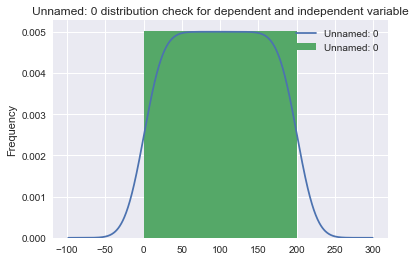

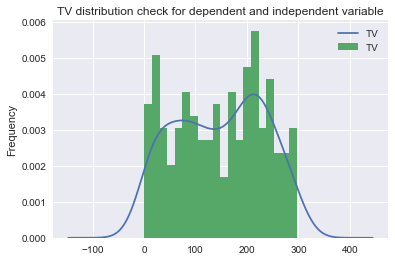

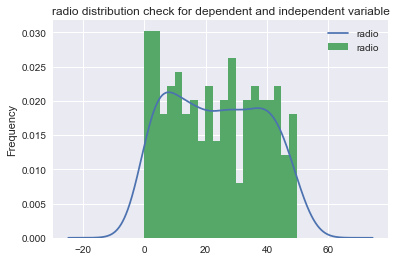

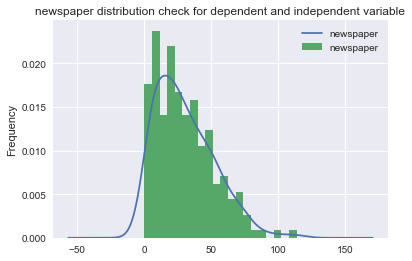

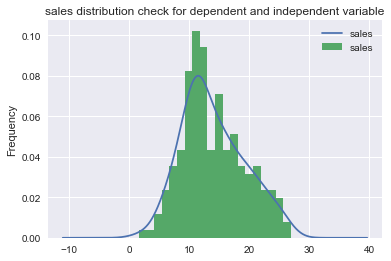

In [7]:
# For all the variables, check distribution by creating a histogram with kde
for i in df: 
    df[i].plot.kde()
    df[i].plot.hist(density = True, bins = 20)
    plt.title(i +" distribution check for dependent and independent variable")
    plt.legend()
    plt.show()

In [ ]:
# Record your observations here 
'''
All look normally distributed except for newspaper (right skew)
and TV to a much lesser extent


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

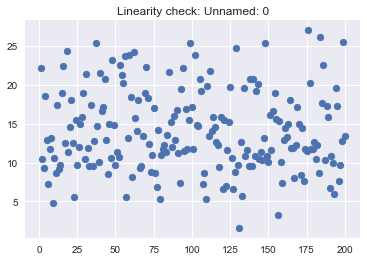

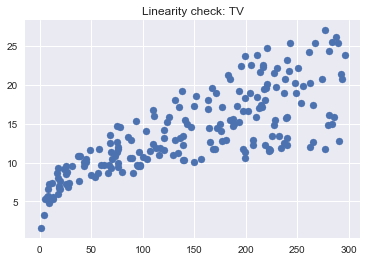

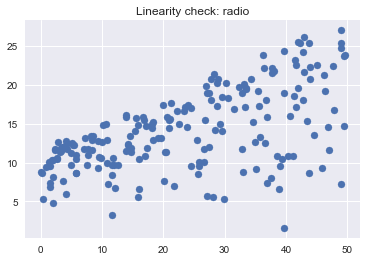

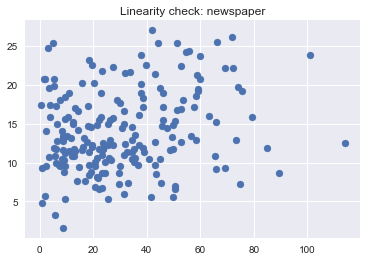

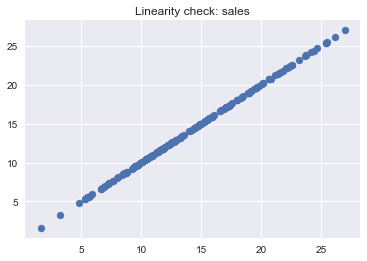

In [10]:
# visualize the relationship between the preditors and the target using scatterplots
for i in df:
    plt.scatter(df[i], df.sales)
    plt.title("Linearity check: "+i)
    plt.show()


In [11]:
# Record yor observations on linearity here 
'''
TV and radio very much appear to have the cone shape and do display linearity, 
but the newspaper column does not appear to display much of a linear relationship
'''

'\nTV and radio very much appear to have the cone shape and do display linearity, \nbut the newspaper column does not appear to display much of a linear relationship\n'

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [28]:
# import libraries

# build the formula 
f = 'sales~TV'
model = ols(formula=f, data=df).fit()

# create a fitted model in one line


## Step 5: Get Regression Diagnostics Summary

In [29]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        22:15:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

      TV
0    0.7
1  296.4
0     7.065869
1    21.122454
dtype: float64


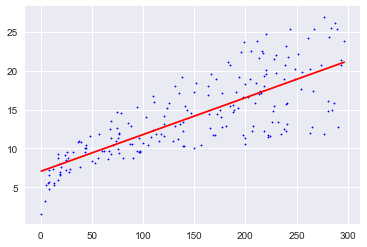

In [43]:
# create a DataFrame with the minimum and maximum values of TV
TVdf = pd.DataFrame({'TV':[df.TV.min(), df.TV.max()]})
print(TVdf.head())
# make predictions for those x values and store them
preds = model.predict(TVdf)
print (preds)

plt.plot(TVdf, preds, c = 'red')
plt.scatter(df.TV,df.sales, c = 'blue', s = 2)
# first, plot the observed data and the least squares line

## Step 7: Visualize the error term for variance and heteroscedasticity

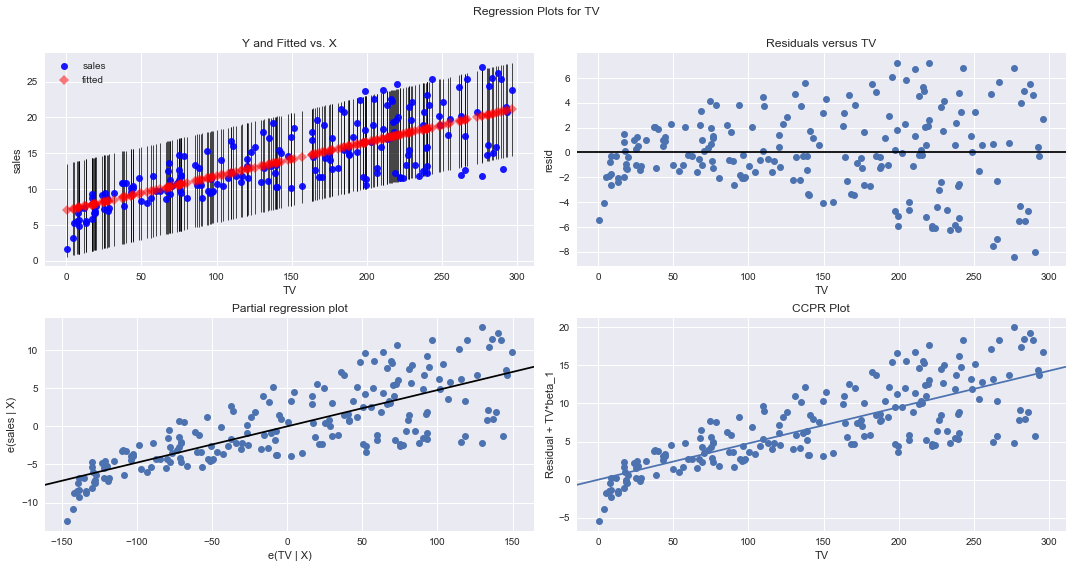

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

In [ ]:
# Record Your observations on heteroscedasticity
'''all three show growing variance as X increases, the residuals vs TV shows 
increasing errors as the predictor variables increase, which raises a question
about the homoscedasticity'''

## Step 8: Check the normality assumptions by creating a QQ-plot

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


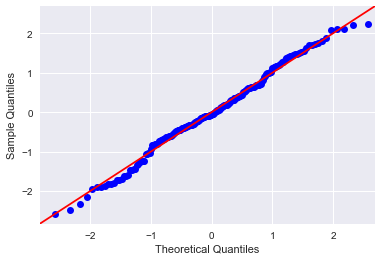

In [32]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
# Record Your observations on the normality assumption
'''No big outliers, there is general adherence to the line'''


## Step 9: Repeat the above for radio and record your observations

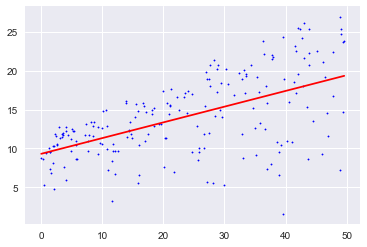

In [46]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
g = 'sales~radio'
model_radio = ols(formula=g, data=df).fit()
radio_minmax = pd.DataFrame({'radio': [df.radio.min(), df.radio.max()]})
radio_preds = model_radio.predict(radio_minmax)

plt.plot(radio_minmax, radio_preds, c = 'red')
plt.scatter(df['radio'], df['sales'], c = 'blue', s = 2)

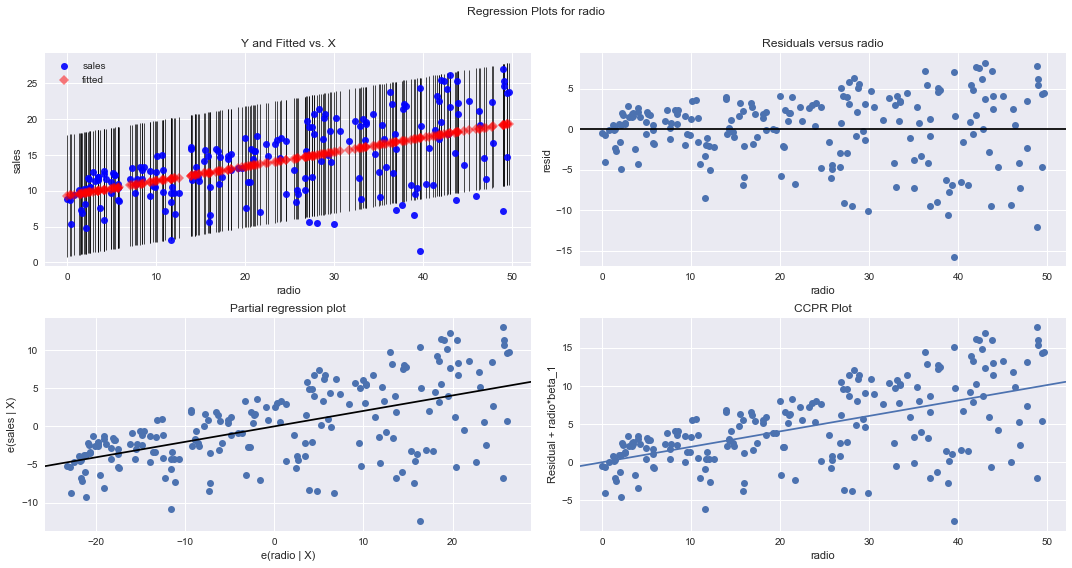

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


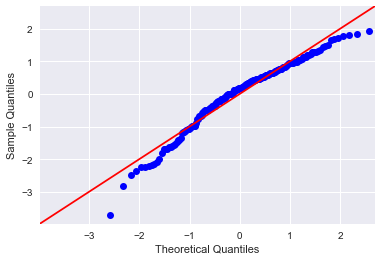

In [49]:
model_radio.summary()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_radio, "radio", fig=fig)
plt.show()

residuals = model_radio.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [79]:
# Record your observations here for goodnes of fit 
'''This model does not appear to be a good fit.  The observed values are far outside of
the expected range on the Y and Fitted vs. X chart; there is a pattern in the Residuals
versus radio chart (meaning that there is heteroscedasticity), and the QQ plot does not 
adhere to the line; it appears to be more of a log line than a straight line.'''

## The Answer

Based on the above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of techniques we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used statsmodel to perform linear regression and evaluated your models using statistical metrics. You also looked for the regression assumptions before and after the analysis phase. Finally, you created some visualizations of your models and checked their goodness of fit. 